In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

In [3]:
train_generator.class_indices

{'Tomato_Early_blight': 0, 'Tomato_Late_blight': 1, 'Tomato_healthy': 2}

In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [5]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6158573  0.59624946 0.61193573]
  [0.61761767 0.5980098  0.6136961 ]
  [0.6202331  0.6006253  0.61631155]
  ...
  [0.4862133  0.47052702 0.46660545]
  [0.48627454 0.47058827 0.4666667 ]
  [0.4900251  0.4743388  0.47041723]]

 [[0.6176337  0.59802586 0.61371213]
  [0.6190702  0.59946233 0.6151486 ]
  [0.61841625 0.5988084  0.6144947 ]
  ...
  [0.48627454 0.47058827 0.4666667 ]
  [0.48681226 0.471126   0.46720442]
  [0.4901961  0.47450984 0.47058827]]

 [[0.5538597  0.53425187 0.54993814]
  [0.56301594 0.5434081  0.55909437]
  [0.57413167 0.5545238  0.5702101 ]
  ...
  [0.48627454 0.47058827 0.4666667 ]
  [0.48746613 0.47177985 0.46785828]
  [0.4901961  0.47450984 0.47058827]]

 ...

 [[0.5132141  0.4975278  0.49360624]
  [0.62173253 0.60604626 0.6021247 ]
  [0.55556023 0.53987396 0.5359524 ]
  ...
  [0.5465267  0.49554625 0.4641737 ]
  [0.54783434 0.49685398 0.46548143]
  [0.54901963 0.49803925 0.4666667 ]]

 [[0.51125246 0.49556622 0.49164465]
  [0.64854103 0.63285476 0.6289332 ]


In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 449 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 902 images belonging to 3 classes.


In [8]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.43343174 0.40598077 0.46872586]
  [0.46723956 0.43978858 0.50253373]
  [0.42861786 0.4011669  0.46391198]
  ...
  [0.61442465 0.5987384  0.66540504]
  [0.62062305 0.6049368  0.67160344]
  [0.62682146 0.6111352  0.67780185]]

 [[0.4305391  0.40308812 0.46583325]
  [0.46558663 0.43813565 0.5008808 ]
  [0.43109724 0.40364626 0.46639135]
  ...
  [0.55579245 0.5401062  0.60677284]
  [0.5502138  0.53452754 0.6011942 ]
  [0.54463524 0.52894896 0.5956156 ]]

 [[0.42764652 0.40019554 0.46294063]
  [0.46393374 0.43648276 0.49922785]
  [0.4335766  0.40612563 0.46887073]
  ...
  [0.4901531  0.47446683 0.54113346]
  [0.4872605  0.47157422 0.5382409 ]
  [0.48436788 0.4686816  0.5353483 ]]

 ...

 [[0.38018167 0.33312285 0.37233853]
  [0.38390073 0.3368419  0.3760576 ]
  [0.3876198  0.34056097 0.37977666]
  ...
  [0.58695453 0.555582   0.6065624 ]
  [0.5007712  0.46939868 0.52037907]
  [0.62166643 0.5902939  0.6412743 ]]

 [[0.44899753 0.4019387  0.4411544 ]
  [0.4518901  0.4048313  0.44404697]


In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
3149/32

98.40625

In [13]:
449/32

14.03125

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=98,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=14,
    verbose=1,
    epochs=20,
)

Epoch 1/20
98/98 [==============================] - 181s 2s/step - loss: 0.9872 - accuracy: 0.4803 - val_loss: 0.7510 - val_accuracy: 0.7188
Epoch 2/20
98/98 [==============================] - 200s 2s/step - loss: 0.4431 - accuracy: 0.8256 - val_loss: 0.5066 - val_accuracy: 0.7790
Epoch 3/20
98/98 [==============================] - 190s 2s/step - loss: 0.3503 - accuracy: 0.8540 - val_loss: 0.3084 - val_accuracy: 0.8460
Epoch 4/20
98/98 [==============================] - 234s 2s/step - loss: 0.2690 - accuracy: 0.8839 - val_loss: 0.2572 - val_accuracy: 0.8817
Epoch 5/20
98/98 [==============================] - 232s 2s/step - loss: 0.2801 - accuracy: 0.8874 - val_loss: 0.3874 - val_accuracy: 0.8527
Epoch 6/20
98/98 [==============================] - 188s 2s/step - loss: 0.2556 - accuracy: 0.8951 - val_loss: 0.2576 - val_accuracy: 0.8951
Epoch 7/20
98/98 [==============================] - 197s 2s/step - loss: 0.2358 - accuracy: 0.9102 - val_loss: 0.2165 - val_accuracy: 0.9040
Epoch 8/20
98

In [15]:
scores = model.evaluate(test_generator)

29/29 [==============================] - 31s 1s/step - loss: 0.2037 - accuracy: 0.9557


In [16]:
scores

[0.20373384654521942, 0.9556540846824646]

In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 98}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9872133731842041,
 0.4430905878543854,
 0.3502809405326843,
 0.2690388858318329,
 0.2801307141780853]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
val_acc

[0.71875,
 0.7790178656578064,
 0.8459821343421936,
 0.8816964030265808,
 0.8526785969734192,
 0.8950892686843872,
 0.9040178656578064,
 0.9196428656578064,
 0.8950892686843872,
 0.9151785969734192,
 0.8638392686843872,
 0.9129464030265808,
 0.9129464030265808,
 0.8660714030265808,
 0.9285714030265808,
 0.9419642686843872,
 0.9352678656578064,
 0.9308035969734192,
 0.8861607313156128,
 0.9553571343421936]

In [25]:
acc

[0.48026949167251587,
 0.8255739808082581,
 0.8540263175964355,
 0.8838626742362976,
 0.8873917460441589,
 0.8950914144515991,
 0.9101700186729431,
 0.925569474697113,
 0.9114533066749573,
 0.9223612546920776,
 0.9380815029144287,
 0.9278151988983154,
 0.9428938031196594,
 0.9326274991035461,
 0.9525184631347656,
 0.9592556953430176,
 0.9486685991287231,
 0.9576516151428223,
 0.9589348435401917,
 0.9659929275512695]

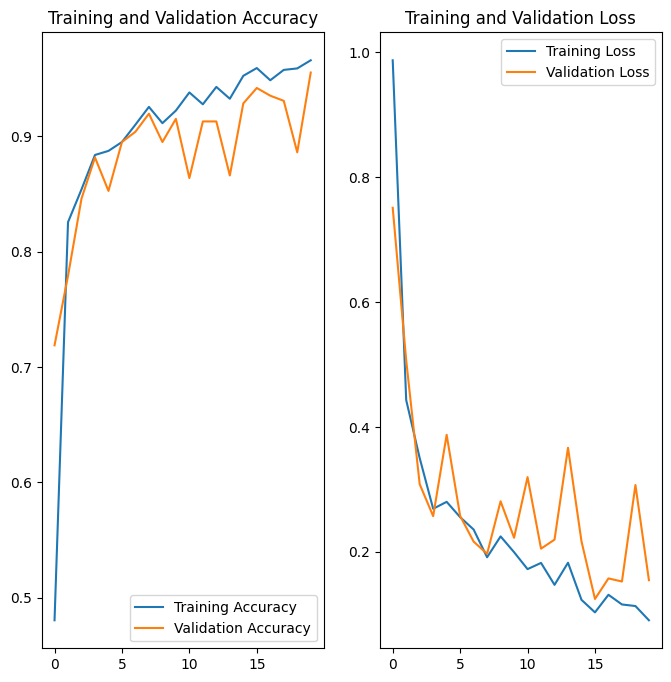

In [26]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


first image to predict
actual label: Tomato_Early_blight
1/1 [==============================] - 1s 666ms/step
predicted label: Tomato_healthy


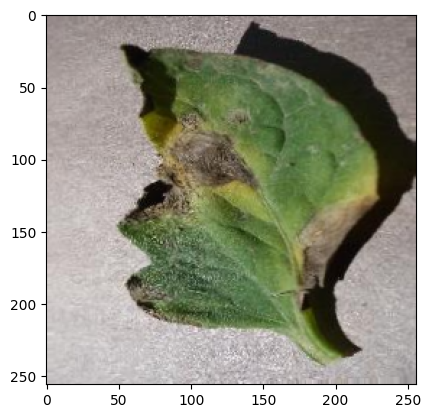

In [30]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


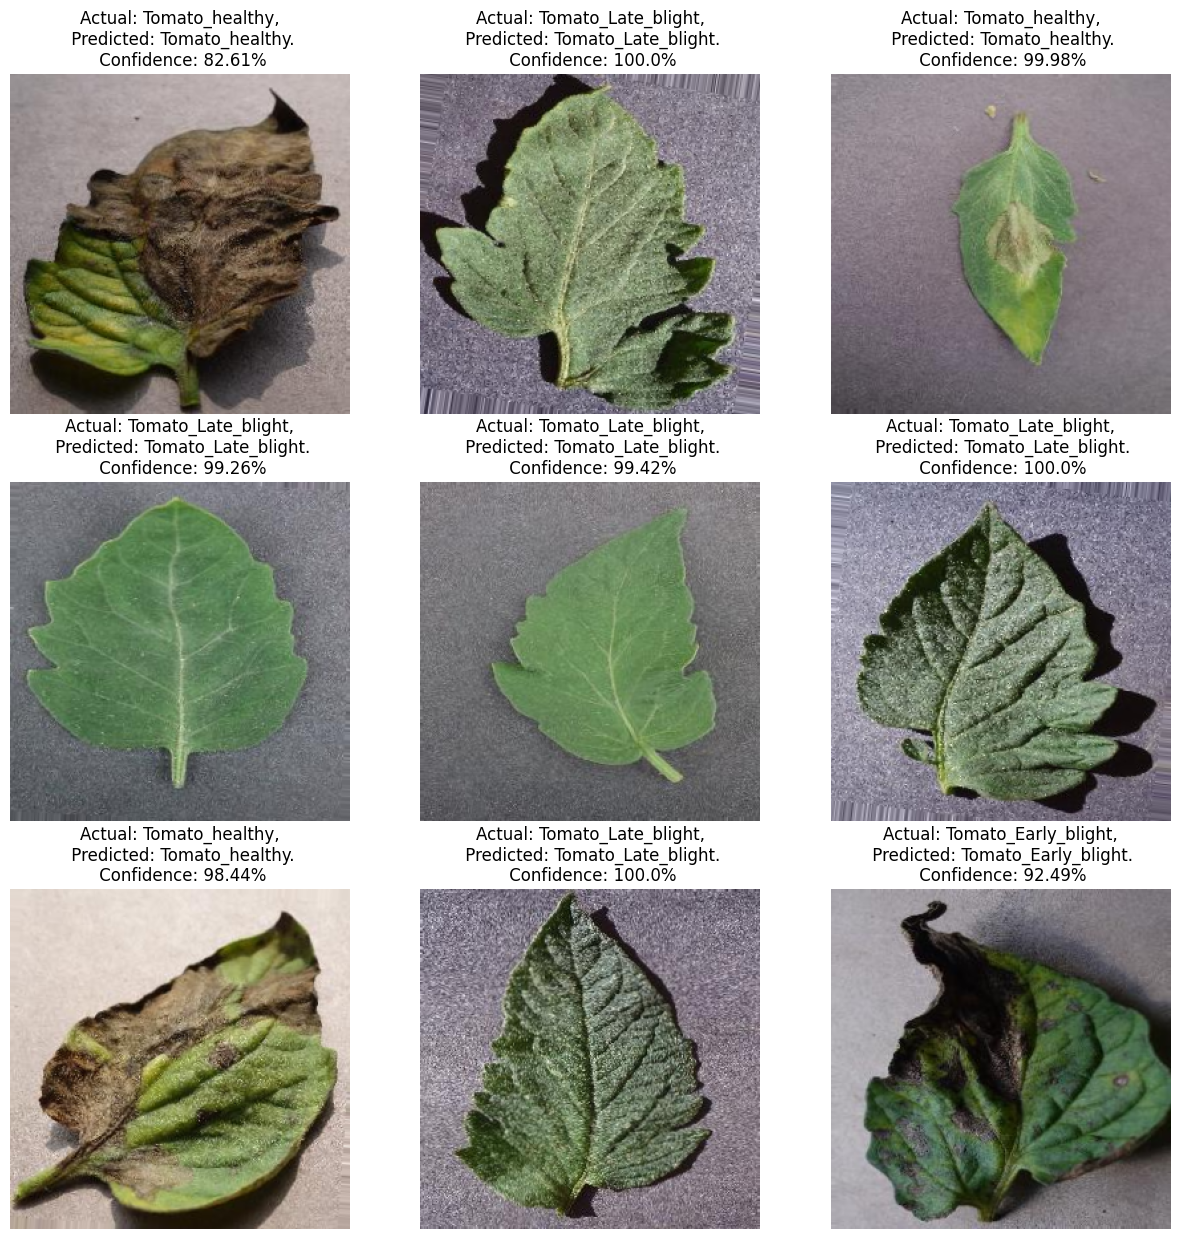

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [33]:
model.save("../tomatoes.h5")

C:\Users\Sahil B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
